# Generate pretty plots for GLAM models

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path

import matplotlib.pyplot as plt

In [2]:
import pymc3 as pm

In [3]:
np.random.seed(23) # from random.org

# MORE frame 32 participants

In [4]:
# Load data
sufix = '_individual_More_NoBin_excludedTrial_Gamma_01_NUTS_32'
data = pd.read_csv(str('data/PF2019_data/GlamDataPF2019_More_NoBin_33.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,1,0,1,1734.284,110,131,0.669090,0.330910
1,1,1,0,6555.370,47,50,0.759630,0.240370
2,1,2,0,3174.566,50,44,0.549371,0.450629
3,1,3,1,2877.579,57,50,0.608409,0.391591
4,1,4,1,1806.310,42,50,0.522849,0.477151


In [5]:
data.subject.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33])

In [6]:
len(data.subject.unique())

32

In [7]:
data

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,1,0,1,1734.284,110,131,0.669090,0.330910
1,1,1,0,6555.370,47,50,0.759630,0.240370
2,1,2,0,3174.566,50,44,0.549371,0.450629
3,1,3,1,2877.579,57,50,0.608409,0.391591
4,1,4,1,1806.310,42,50,0.522849,0.477151
5,1,5,0,3636.816,108,110,0.559774,0.440226
6,1,6,1,3650.266,78,80,0.682034,0.317966
7,1,7,0,3078.223,110,92,0.565221,0.434779
8,1,8,1,1259.268,50,48,0.508019,0.491981
9,1,9,0,3440.738,110,101,0.558373,0.441627


## Remove unestable participants

In [8]:
data = data[ (data['subject'] != 1) & (data['subject'] != 13) & (data['subject'] != 16) & (data['subject'] != 20)]

In [9]:
data

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
120,2,0,1,6228.547,110,131,0.575607,0.424393
121,2,1,1,6635.751,47,50,0.533658,0.466342
122,2,2,0,4766.744,50,44,0.794866,0.205134
123,2,3,0,10945.402,57,50,0.697909,0.302091
124,2,4,1,5673.265,42,50,0.830204,0.169796
125,2,5,1,46657.359,108,110,0.119482,0.880518
126,2,6,0,7750.691,78,80,0.718690,0.281310
127,2,7,0,9776.843,110,92,0.552407,0.447593
128,2,8,1,7758.235,50,48,0.419489,0.580511
129,2,9,0,44526.337,110,101,0.912837,0.087163


## Split data in training and test sets

In [10]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1680 trials) and test (1680 trials) sets...


# Load predictions

## Full Model

In [11]:
glam_full = glam.GLAM(train_data)

# if individual

glam_full.type = "individual"

In [12]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('results/predictions/glam_PF2019_full'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'), index=False)
else:
    print('  Found old  full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1680 trials) with new data (1680 trials)...
  Found old  full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,0.0,0.0,3685.0,50,0.549371,44,0.450629
1,1.0,0.0,1.0,0.0,2936.0,50,0.549371,44,0.450629
2,1.0,0.0,2.0,0.0,1627.0,50,0.549371,44,0.450629
3,1.0,0.0,3.0,0.0,5228.0,50,0.549371,44,0.450629
4,1.0,0.0,4.0,0.0,3224.0,50,0.549371,44,0.450629


Close Figure to continue...


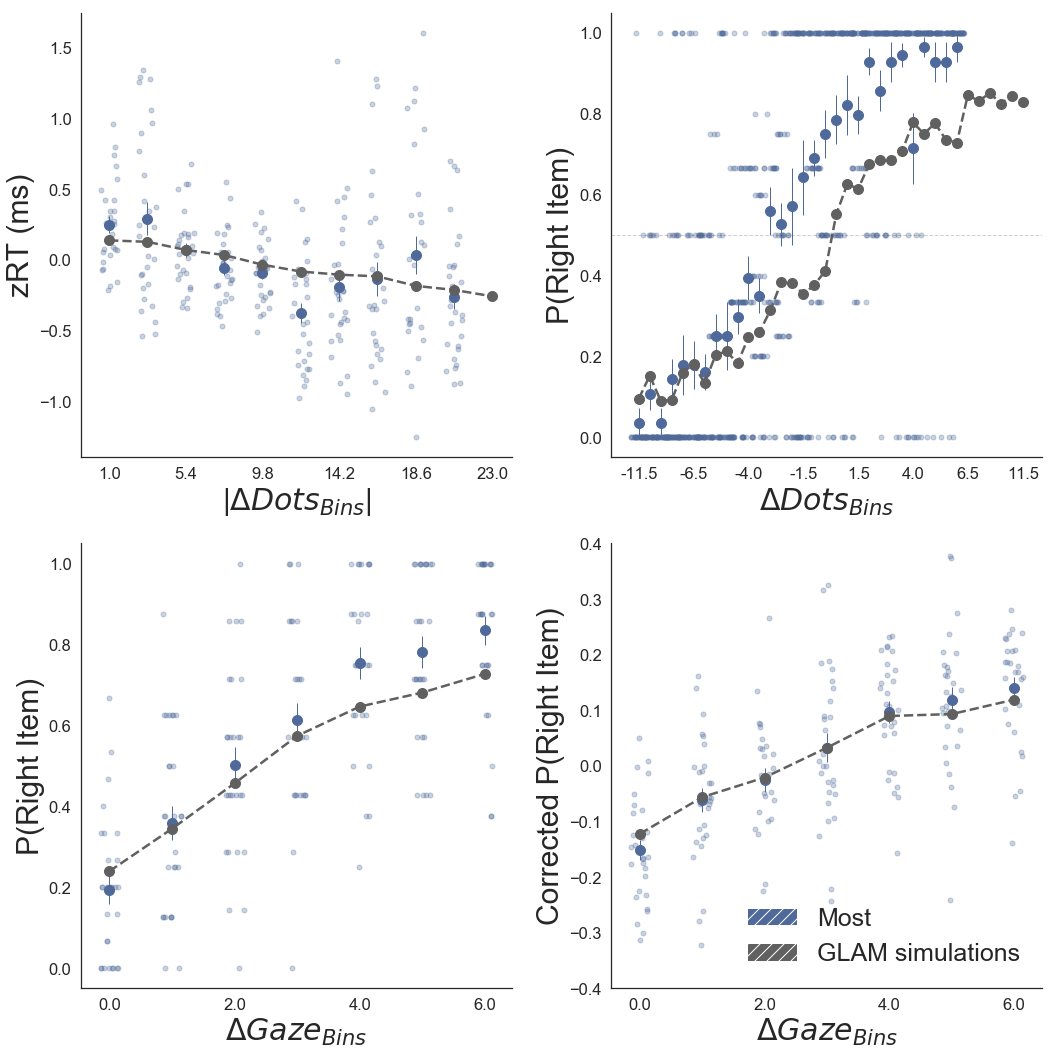

In [14]:
print('Close Figure to continue...')
glam.plots_pretty_GLAM.plot_fit(test_data, [glam_full.prediction], color_data = '#4F6A9A',label1 = 'Most', label2 = 'GLAM simulations');
#plt.savefig(str('SavedFigures/PF2019GLAM_simulations_More.png'), dpi = 200 )

plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

In [21]:
# Mode to update!!!!

---------------------------------------------------------
# LESS frame NUTS 32

In [22]:
# Load data
sufix = '_individual_Less_NoBin_excludedTrial_Gamma_01_NUTS_32'
#sufix = '_Dislike_NoBin_Dislike_NUTS_Inv_31'
data = pd.read_csv(str('data/PF2019_data/GlamDataPF2019_Less_NoBin_33.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,1,0,0,4261.735,110,131,0.603448,0.396552
1,1,1,1,3559.258,47,50,0.490772,0.509228
2,1,2,1,3754.464,50,44,0.490893,0.509107
3,1,3,0,2431.751,57,50,0.639125,0.360875
4,1,4,0,2199.342,42,50,0.702232,0.297768


## Remove unestable participants

In [23]:
data = data[ (data['subject'] != 1) & (data['subject'] != 13) & (data['subject'] != 16) & (data['subject'] != 20)]

## Split data in training and test sets

In [24]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1680 trials) and test (1680 trials) sets...


# Load predictions

## Full Model

In [25]:
glam_full = glam.GLAM(train_data)
glam_full.type = "individual"

In [26]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('results/predictions/glam_PF2019_full'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'), index=False)
else:
    print('  Found old  full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1680 trials) with new data (1680 trials)...
  Found old  full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,0.0,1.0,2930.0,47,0.490772,50,0.509228
1,1.0,0.0,1.0,0.0,2556.0,47,0.490772,50,0.509228
2,1.0,0.0,2.0,0.0,1611.0,47,0.490772,50,0.509228
3,1.0,0.0,3.0,1.0,3633.0,47,0.490772,50,0.509228
4,1.0,0.0,4.0,0.0,2747.0,47,0.490772,50,0.509228


Close Figure to continue...


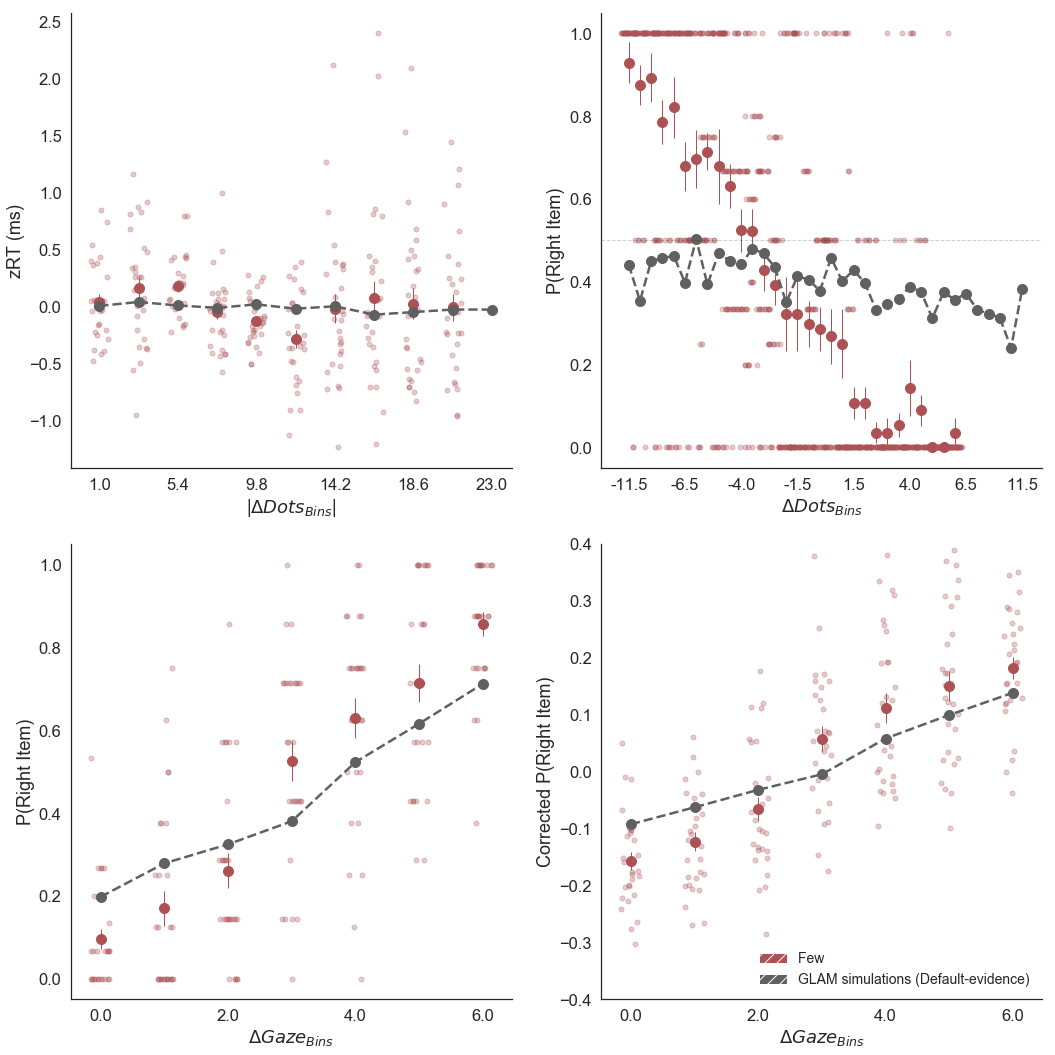

In [27]:
print('Close Figure to continue...')

glam.plots_pretty_GLAM.plot_fit(test_data, [glam_full.prediction], color_data = '#AC5255',label1 = 'Few ',label2 = 'GLAM simulations (Default-evidence)');
#plt.savefig(str('SavedFigures/PF2019GLAM_simulations_Less.png'), dpi = 200 )

plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

---------------------------------------------------------
# LESS frame Inverted NUTS 33

In [28]:
# Load data
sufix = '_individual_Less_Inv_NoBin_excludedTrial_Gamma_01_NUTS_32'
data = pd.read_csv(str('data/PF2019_data/GlamDataPF2019_Less_Inv_NoBin_33.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,1,0,0,4261.735,63,42,0.603448,0.396552
1,1,1,1,3559.258,126,123,0.490772,0.509228
2,1,2,1,3754.464,123,129,0.490893,0.509107
3,1,3,0,2431.751,116,123,0.639125,0.360875
4,1,4,0,2199.342,131,123,0.702232,0.297768


## Remove unestable participants

In [68]:
data = data[ (data['subject'] != 1) & (data['subject'] != 13) & (data['subject'] != 16) & (data['subject'] != 20)]

## Split data in training and test sets

In [29]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1920 trials) and test (1920 trials) sets...


# Load predictions

## Full Model

In [30]:
glam_full = glam.GLAM(train_data)

In [31]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('results/predictions/glam_PF2019_full'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'), index=False)
else:
    print('  Found old  full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_PF2019_full'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1920 trials) with new data (1920 trials)...
  Found old  full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,0.0,1.0,3604.0,126,0.490772,123,0.509228
1,1.0,0.0,1.0,0.0,2703.0,126,0.490772,123,0.509228
2,1.0,0.0,2.0,0.0,1604.0,126,0.490772,123,0.509228
3,1.0,0.0,3.0,0.0,4477.0,126,0.490772,123,0.509228
4,1.0,0.0,4.0,0.0,2934.0,126,0.490772,123,0.509228


Close Figure to continue...


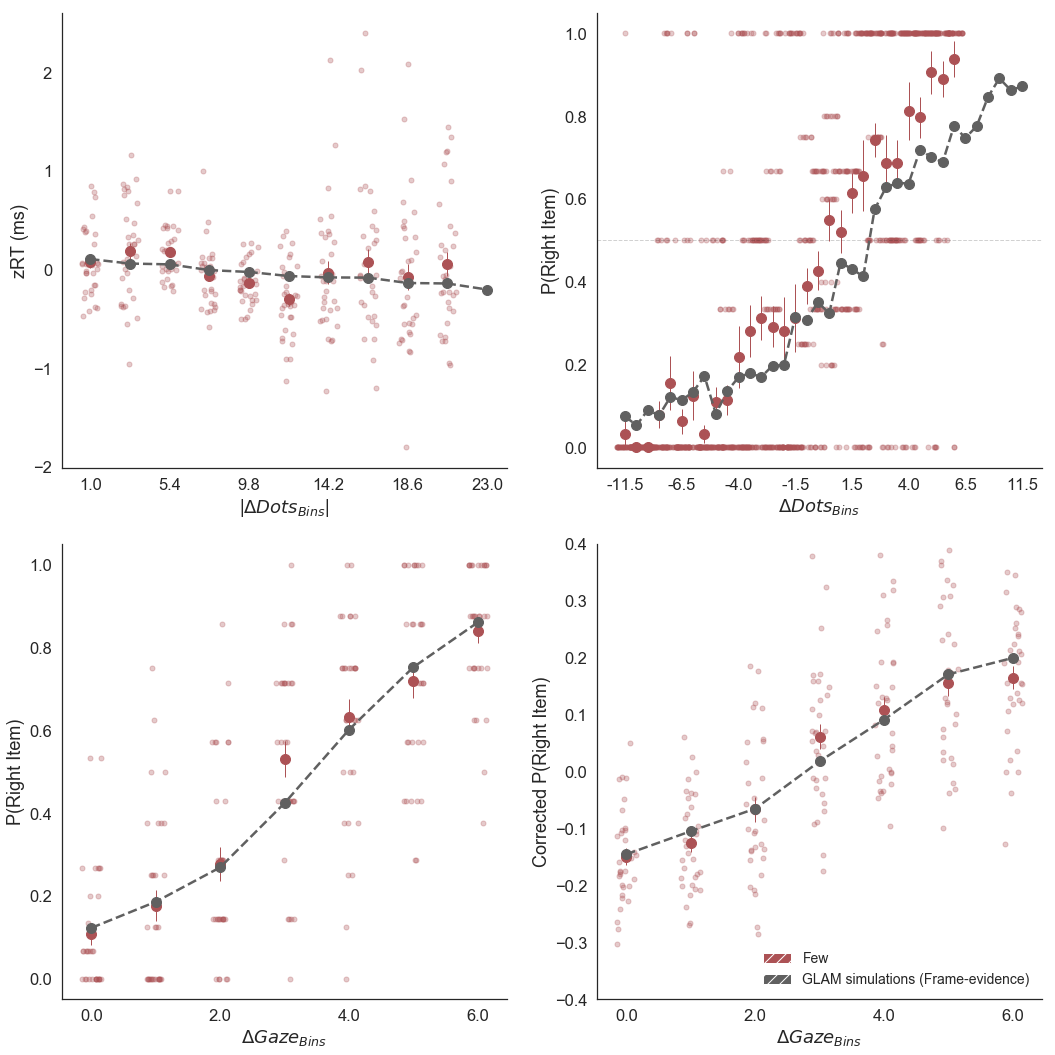

In [32]:
print('Close Figure to continue...')

glam.plots_pretty_GLAM.plot_fit(test_data, [glam_full.prediction], color_data = '#AC5255',label1 = 'Few', label2 = 'GLAM simulations (Frame-evidence)');
#plt.savefig(str('SavedFigures/PF2019GLAM_simulations_LessInv.png'), dpi = 200 )

plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

## REMEMBER THIS CASE IS NEGATIVE DELTA VALUE BECAUSE IT IS THE INVERTED CASE